In [47]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from src.loader import Loader
from src.extractor import Extractor

In [48]:
def show_image(img):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(img)
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

# Image

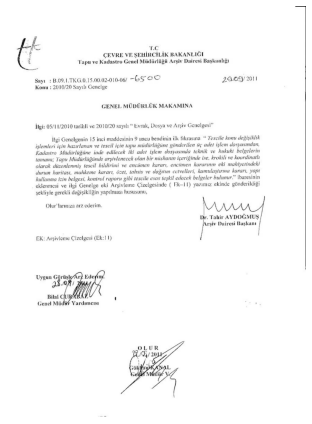

In [49]:
path = './data/input/signed_image.jpeg'
image = cv2.imread('./data/input/signed_image.jpeg')
show_image(image)

## Loader

The loader reads the file and create a mask. 

The mask is an numpy array. The bright parts are set to 255, the rest is set to 0.

In [50]:
loader = Loader()
print(loader)

[  0 255]


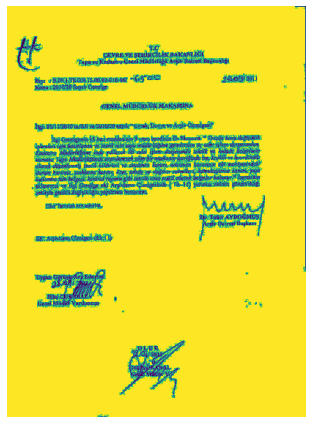

In [51]:
mask = loader.get_masks(path)[0]
print(np.unique(mask))
show_image(mask)

## Extractor

The extractor 

1. generates the regions from the mask.
2. removes the small and the big region because the signature is neither too big nor too small.

In [29]:
extractor = Extractor()
print(extractor)


Extractor
outlier_weight = 3
outlier_bias = 100
> small_outlier_size = outlier_weight * average_region_size + outlier_bias
amplfier = 10
> large_outlier_size = amplfier * small_outlier_size
min_area_size = 10 (pixels)
> min_area_size is used to calculate average_region_size.



The indexes of regions: 
[   0    1   14   46 1347 1427 1664 2049 2338 3130 3685 4054]


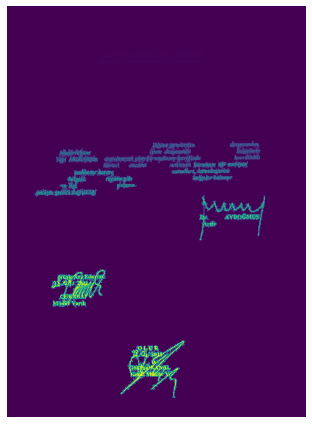

In [33]:
labeled_mask = extractor.extract(mask)
print('The indexes of regions: \n{}'.format(np.unique(labeled_mask)))
show_image(labeled_mask)